In [104]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn
from tqdm import tqdm

In [105]:
class Random_Walks:
    def __init__(self):
        self.actions = [0,1] #0->left, 1->right
        self.true_values = np.zeros(7)
        self.true_values[1:6] = np.arange(1,6)/6
        self.true_values[6] = 1
        
    def TD(self, values, alpha = 0.1):
        state = 3
        series = [state]
        all_rewards = [0]
        
        while(True):
            prev_state = state
            if(np.random.binomial(1,0.5) == self.actions[0]):
                state -= 1
            else:
                state += 1
            
            step_reward = 0
            series.append(state)
            
            values[prev_state] += alpha*(step_reward + values[state] - values[prev_state])
            if(state == 6 or state == 0):
                break
            all_rewards.append(step_reward)
        return series, all_rewards
    
    def MC(self, values, alpha=0.1):
        state = 3
        series = [state]
        
        while(True):
            if(random.random() < 0.5):
                state -= 1
            else:
                state += 1
            
            series.append(state)
            if(state == 6):
                returns = 1
                break
            elif(state == 0):
                returns = 0
                break
            
        for state in series[:-1]:
            values[state] += alpha*(returns - values[state])
                
        return series, [returns for i in range(len(series)-1)]
    
    def leftplot(self):
        episodes = [0,1,10,100]
        values = np.zeros(7)
        values[1:6] = 0.5
        values[6] = 1
        
        plt.figure(figsize=(20,10))
        for epi in range(101):
            if(epi in episodes):
                plt.plot([1,2,3,4,5], values[1:-1], label=str(epi) + ' episodes')
            series, rewards = self.TD(values)
        
        plt.plot([1,2,3,4,5], self.true_values[1:-1], label='true_values')
        plt.xlabel('state')
        plt.ylabel('estimated values')
        plt.xticks([1,2,3,4,5])
        plt.legend(prop={"size":20})
        
    def rightplot(self):
        alpha = [0.15,0.1,0.05,0.01, 0.02, 0.03, 0.04]
        plt.figure(figsize=(20,10))
        for i in range(len(alpha)):
            total_error = np.zeros(100)
            if(i < 3):
                title = "TD"
                line = "solid"
                for j in range(100):
                    run_errors = []
                    values = np.zeros(7)
                    values[1:6] = 0.5
                    values[6] = 1
                    
                    for k in range(100):
                        run_errors.append(np.sqrt(np.sum((self.true_values - values)**2)/5))
                        series, rewards = self.TD(values, alpha[i])
                    total_error += np.array(run_errors)
            else:
                title = "MC"
                line = "dashdot"
                for j in range(100):
                    run_errors = []
                    values = np.zeros(7)
                    values[1:6] = 0.5
                    values[6] = 1
                    
                    for k in range(100):
                        run_errors.append(np.sqrt(np.sum((self.true_values - values)**2)/5))
                        series, rewards = self.MC(values, alpha[i])
                    total_error += np.array(run_errors)
            total_error/=100
            plt.plot(total_error, linestyle=line, label=title + 'alpha = ' + str(alpha[i]))
        plt.xlabel("episodes")
        plt.ylabel("RMS error")
        plt.legend(prop={"size":20})

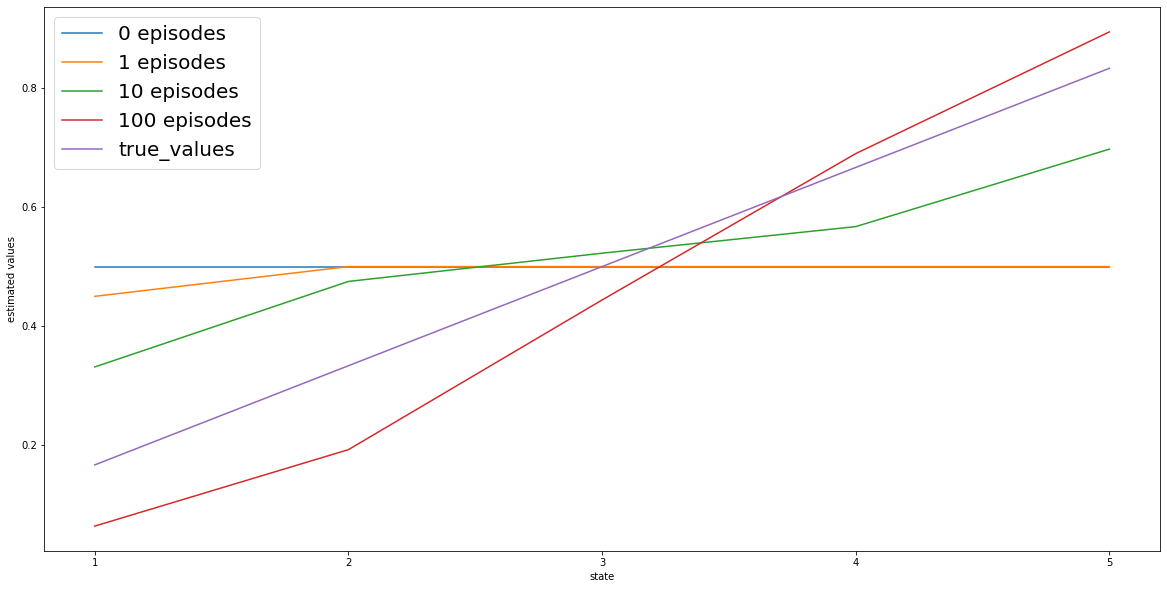

In [106]:
randomwalks = Random_Walks()
randomwalks.leftplot()

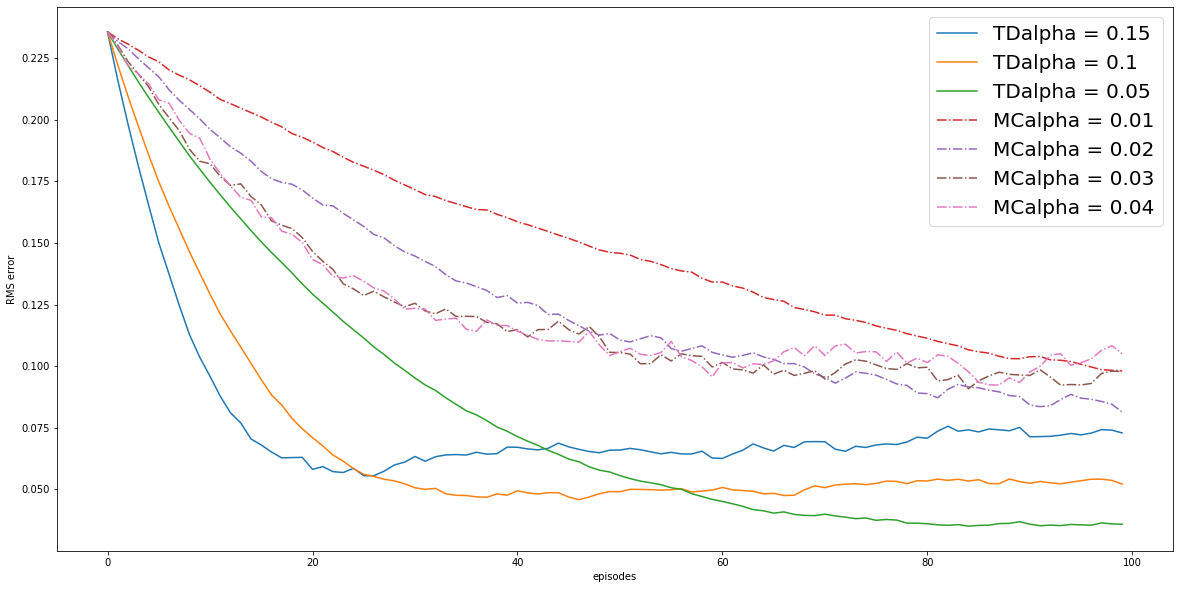

In [107]:
randomwalks.rightplot()